In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
from pyspark.sql import SparkSession, SQLContext, Window
import findspark

In [2]:
findspark.init()

In [3]:
spark = (
    SparkSession.builder
    .appName('HDFS')
    .getOrCreate()
)
spark

In [4]:
sc = spark.sparkContext
sqlContext = SQLContext(sc)

## Weather

In [5]:
df_weather = (
    sqlContext.read.parquet('/user/bdaa/weather/2022-12-17-05-12-13fc975232-44b9-4c24-a9ac-7dd026527564')  
    .withColumn('dt', F.expr('to_timestamp(int(dt / 300) * 300)'))
    .dropDuplicates()
)

df_weather.printSchema()

root
 |-- coord_lon: double (nullable = true)
 |-- coord_lat: double (nullable = true)
 |-- weather_0__id: integer (nullable = true)
 |-- weather_0__main: string (nullable = true)
 |-- weather_0__description: string (nullable = true)
 |-- weather_0__icon: string (nullable = true)
 |-- base: string (nullable = true)
 |-- main_temp: double (nullable = true)
 |-- main_feels_like: double (nullable = true)
 |-- main_temp_min: double (nullable = true)
 |-- main_temp_max: double (nullable = true)
 |-- main_pressure: integer (nullable = true)
 |-- main_humidity: integer (nullable = true)
 |-- visibility: integer (nullable = true)
 |-- wind_speed: double (nullable = true)
 |-- wind_deg: integer (nullable = true)
 |-- clouds_all: integer (nullable = true)
 |-- dt: timestamp (nullable = true)
 |-- sys_type: integer (nullable = true)
 |-- sys_id: integer (nullable = true)
 |-- sys_country: string (nullable = true)
 |-- sys_sunrise: integer (nullable = true)
 |-- sys_sunset: integer (nullable = tru

In [6]:
df_weather.count()

49461

In [7]:
df_weather.show()

+---------+---------+-------------+---------------+----------------------+---------------+--------+---------+---------------+-------------+-------------+-------------+-------------+----------+----------+--------+----------+-------------------+--------+-------+-----------+-----------+----------+--------+-------+------------+---+
|coord_lon|coord_lat|weather_0__id|weather_0__main|weather_0__description|weather_0__icon|    base|main_temp|main_feels_like|main_temp_min|main_temp_max|main_pressure|main_humidity|visibility|wind_speed|wind_deg|clouds_all|                 dt|sys_type| sys_id|sys_country|sys_sunrise|sys_sunset|timezone|     id|        name|cod|
+---------+---------+-------------+---------------+----------------------+---------------+--------+---------+---------------+-------------+-------------+-------------+-------------+----------+----------+--------+----------+-------------------+--------+-------+-----------+-----------+----------+--------+-------+------------+---+
|   4.7295

In [8]:
df_weather = df_weather.drop('weather_0__icon', 'base', 'sys_type', 'sys_id', 'sys_country', 'timezone', 'id', 'name', 'cod')
df_weather.printSchema()

root
 |-- coord_lon: double (nullable = true)
 |-- coord_lat: double (nullable = true)
 |-- weather_0__id: integer (nullable = true)
 |-- weather_0__main: string (nullable = true)
 |-- weather_0__description: string (nullable = true)
 |-- main_temp: double (nullable = true)
 |-- main_feels_like: double (nullable = true)
 |-- main_temp_min: double (nullable = true)
 |-- main_temp_max: double (nullable = true)
 |-- main_pressure: integer (nullable = true)
 |-- main_humidity: integer (nullable = true)
 |-- visibility: integer (nullable = true)
 |-- wind_speed: double (nullable = true)
 |-- wind_deg: integer (nullable = true)
 |-- clouds_all: integer (nullable = true)
 |-- dt: timestamp (nullable = true)
 |-- sys_sunrise: integer (nullable = true)
 |-- sys_sunset: integer (nullable = true)



In [9]:
view_0 = df_weather.select(
    F.col('dt').alias('date'),
    F.col('coord_lon').alias('long'), 
    F.col('coord_lat').alias('lat'), 
    F.col('weather_0__main').alias('weather name'),
    F.col('weather_0__description').alias('weather desc'),
    F.col('main_temp').alias('temp'), 
    F.col('main_feels_like').alias('feels like temp'), 
    F.col('main_temp_min').alias('min temp'), 
    F.col('main_temp_max').alias('max temp'),
).orderBy(F.col('dt'))
view_0.show()

+-------------------+------+-------+------------+----------------+------+---------------+--------+--------+
|               date|  long|    lat|weather name|    weather desc|  temp|feels like temp|min temp|max temp|
+-------------------+------+-------+------------+----------------+------+---------------+--------+--------+
|2022-12-16 16:00:00|4.7391|51.4464|      Clouds|      few clouds|273.38|         270.89|   270.9|  275.88|
|2022-12-16 16:00:00|4.5867|50.4116|      Clouds|      few clouds|272.71|         270.11|  270.62|  274.14|
|2022-12-16 16:00:00|  2.93|  51.22|      Clouds|      few clouds|274.24|         271.89|  273.29|  275.58|
|2022-12-16 16:00:00|2.9639|51.1561|      Clouds|      few clouds|274.03|         272.34|  273.13|  275.59|
|2022-12-16 16:00:00|4.3342|50.8731|      Clouds|      few clouds|272.39|         272.39|  270.42|  274.94|
|2022-12-16 16:00:00|4.9154|51.0905|      Clouds|scattered clouds|272.43|         269.78|  270.88|   275.1|
|2022-12-16 16:00:00|4.6977|

In [10]:
view_0 = df_weather.select(
    F.col('dt').alias('date'),
    F.col('coord_lon').alias('long'), 
    F.col('coord_lat').alias('lat'), 
    F.col('main_pressure').alias('pressure'),
    F.col('main_humidity').alias('humidity'),
    F.col('visibility'),
    F.col('wind_speed').alias('wind speed'),
    F.col('wind_deg').alias('wind degree'),
    F.col('clouds_all').alias('clouds'),
    F.col('sys_sunrise').alias('sunrise'),
    F.col('sys_sunset').alias('sunset'), 
).orderBy(F.col('dt'))
view_0.show()

+-------------------+------+-------+--------+--------+----------+----------+-----------+------+----------+----------+
|               date|  long|    lat|pressure|humidity|visibility|wind speed|wind degree|clouds|   sunrise|    sunset|
+-------------------+------+-------+--------+--------+----------+----------+-----------+------+----------+----------+
|2022-12-16 16:00:00|4.7391|51.4464|    1018|      84|     10000|      2.06|        310|    20|1671176444|1671204753|
|2022-12-16 16:00:00|4.5867|50.4116|    1017|      88|     10000|      2.06|         40|    20|1671176177|1671205093|
|2022-12-16 16:00:00|  2.93|  51.22|    1018|      76|     10000|      2.06|        220|    20|1671176810|1671205255|
|2022-12-16 16:00:00|2.9639|51.1561|    1019|      84|     10000|      1.54|        220|    20|1671176783|1671205266|
|2022-12-16 16:00:00|4.3342|50.8731|    1018|      84|     10000|      1.03|        290|    20|1671176371|1671205020|
|2022-12-16 16:00:00|4.9154|51.0905|    1024|      86|  

In [11]:
df_weather = df_weather.drop('coord_lon', 'coord_lat')

In [12]:
weather = df_weather['dt', 'weather_0__id'].groupBy('dt', 'weather_0__id').count()
window = Window.partitionBy('dt').orderBy(F.desc('count'))
weather = weather \
    .withColumn('order', F.row_number().over(window)) \
    .where(F.col('order') == 1) \
    .drop('count', 'order') \
    .withColumnRenamed('weather_0__id', 'mode_weather_id') \
    .withColumnRenamed('dt', 'dt2')

In [13]:
weather_2 = df_weather['dt', 'weather_0__main'].groupBy('dt', 'weather_0__main').count()
window = Window.partitionBy('dt').orderBy(F.desc('count'))
weather_2 = weather_2 \
    .withColumn('order', F.row_number().over(window)) \
    .where(F.col('order') == 1) \
    .drop('count', 'order') \
    .withColumnRenamed('weather_0__main', 'mode_weather_main') \
    .withColumnRenamed('dt', 'dt3')

In [14]:
weather_3 = df_weather['dt', 'weather_0__description'].groupBy('dt', 'weather_0__description').count()
window = Window.partitionBy('dt').orderBy(F.desc('count'))
weather_3 = weather_3 \
    .withColumn('order', F.row_number().over(window)) \
    .where(F.col('order') == 1) \
    .drop('count', 'order') \
    .withColumnRenamed('weather_0__description', 'mode_weather_desc') \
    .withColumnRenamed('dt', 'dt4')

In [15]:
df_weather = df_weather.drop('weather_0__id')
weather2 = df_weather.groupBy('dt') \
    .agg(F.avg('main_temp').alias('avg_temp'), \
         F.avg('main_feels_like').alias('avg_feels_like_temp'),
         F.avg('main_temp_min').alias('avg_min_temp'),
         F.avg('main_temp_max').alias('avg_max_temp'),
         F.avg('main_pressure').alias('avg_pressure'),
         F.avg('main_humidity').alias('avg_humidity'),
         F.avg('visibility').alias('avg_visibility'),
         F.avg('wind_speed').alias('avg_wind_speed'),
         F.avg('wind_deg').alias('avg_wind_deg'),
         F.avg('clouds_all').alias('avg_clouds'),
         F.avg('sys_sunrise').alias('avg_sunrise'),
         F.avg('sys_sunset').alias('avg_sunset'),
     ) \
    .withColumn('avg_sunrise', F.expr('int(avg_sunrise)')) \
    .withColumn('avg_sunset', F.expr('int(avg_sunset)'))

In [16]:
weather = weather.join(weather_2, weather.dt2 == weather_2.dt3).drop('dt3')
weather = weather.join(weather_3, weather.dt2 == weather_3.dt4).drop('dt4')
weather = weather.join(weather2, weather.dt2 == weather2.dt).drop('dt2')

In [17]:
weather.show()

+---------------+-----------------+-----------------+-------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------+----------+
|mode_weather_id|mode_weather_main|mode_weather_desc|                 dt|          avg_temp|avg_feels_like_temp|      avg_min_temp|      avg_max_temp|      avg_pressure|     avg_humidity|    avg_visibility|    avg_wind_speed|      avg_wind_deg|        avg_clouds|avg_sunrise|avg_sunset|
+---------------+-----------------+-----------------+-------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------+----------+
|            701|             Mist|             mist|2022-12-17 04:55:00|267.95987447698747|  265.5213249651326| 266.1047559274757|270.5730

## Prices

In [18]:
df_prices = (
    sqlContext.read.parquet('/user/bdaa/energy_prices/2022-12-17-05-13-179225cf8b-1f0c-498c-a32b-dbcb0d8e4b45')
        .withColumn('Datetime__UTC_', F.unix_timestamp('Datetime__UTC_'))
        .withColumn('Datetime__UTC_', F.expr('to_timestamp(int((Datetime__UTC_ + 251129400) / 300) * 300)'))
)
df_prices.printSchema()

root
 |-- Country: string (nullable = true)
 |-- ISO3_Code: string (nullable = true)
 |-- Datetime__UTC_: timestamp (nullable = true)
 |-- Datetime__Local_: string (nullable = true)
 |-- Price__EUR_MWhe_: double (nullable = true)



In [19]:
df_prices.count()

2465

In [20]:
df_prices.show()

+-------+---------+-------------------+-------------------+------------------+
|Country|ISO3_Code|     Datetime__UTC_|   Datetime__Local_|  Price__EUR_MWhe_|
+-------+---------+-------------------+-------------------+------------------+
|Belgium|      BEL|2022-12-16 15:55:00|2015-01-01 02:45:40| 30.39532673191921|
|Belgium|      BEL|2022-12-16 15:55:00|2015-01-01 02:45:35|27.922168293989124|
|Belgium|      BEL|2022-12-16 15:55:00|2015-01-01 02:45:45|27.394208217127474|
|Belgium|      BEL|2022-12-16 15:55:00|2015-01-01 02:46:50| 27.81659566494169|
|Belgium|      BEL|2022-12-16 15:55:00|2015-01-01 02:46:55|30.707566352906895|
|Belgium|      BEL|2022-12-16 15:55:00|2015-01-01 02:47:00|27.818987241647637|
|Belgium|      BEL|2022-12-16 15:55:00|2015-01-01 02:47:05|28.719630411119333|
|Belgium|      BEL|2022-12-16 15:55:00|2015-01-01 02:45:35|27.922168293989124|
|Belgium|      BEL|2022-12-16 15:55:00|2015-01-01 02:45:40| 30.39532673191921|
|Belgium|      BEL|2022-12-16 15:55:00|2015-01-01 02

In [21]:
df_prices = df_prices.drop('Country', 'ISO3_Code', 'Datetime__Local_') \
            .withColumnRenamed('Datetime__UTC_', 'dt_prices') \
            .withColumnRenamed('Price__EUR_MWhe_', 'price') \
            .groupBy('dt_prices').agg(F.avg('price').alias('avg_price'))

In [22]:
df_prices.show()

+-------------------+------------------+
|          dt_prices|         avg_price|
+-------------------+------------------+
|2022-12-16 18:05:00| 33.97022710270928|
|2022-12-16 16:55:00|28.031349965259228|
|2022-12-16 16:15:00| 27.83741654692217|
|2022-12-16 17:35:00|30.885670970193846|
|2022-12-16 18:35:00| 38.80183312399668|
|2022-12-16 18:00:00| 33.39830537887251|
|2022-12-16 17:30:00|30.544822057531256|
|2022-12-16 16:10:00| 28.15346578005265|
|2022-12-16 18:15:00|35.545279918791856|
|2022-12-16 18:55:00|42.345201859412064|
|2022-12-16 15:55:00| 28.64970116725024|
|2022-12-16 17:45:00|31.884012986140394|
|2022-12-16 17:55:00| 33.01107540635505|
|2022-12-16 17:15:00|28.979714278087364|
|2022-12-16 19:10:00|44.622789367830855|
|2022-12-16 18:10:00|34.567584484174795|
|2022-12-16 16:35:00| 28.01822750887067|
|2022-12-16 17:20:00|29.238047875287798|
|2022-12-16 19:15:00| 45.10807661504458|
|2022-12-16 16:20:00| 27.98963638138911|
+-------------------+------------------+
only showing top

In [23]:
data = weather.join(df_prices, weather.dt == df_prices.dt_prices).drop('dt_prices')

In [24]:
data.show()

+---------------+-----------------+-----------------+-------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------+----------+------------------+
|mode_weather_id|mode_weather_main|mode_weather_desc|                 dt|          avg_temp|avg_feels_like_temp|      avg_min_temp|      avg_max_temp|      avg_pressure|     avg_humidity|    avg_visibility|    avg_wind_speed|      avg_wind_deg|        avg_clouds|avg_sunrise|avg_sunset|         avg_price|
+---------------+-----------------+-----------------+-------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------+----------+------------------+
|            701|             Mist|             mist|2022-12-16 18:05:00|         

In [25]:
data.printSchema()

root
 |-- mode_weather_id: integer (nullable = true)
 |-- mode_weather_main: string (nullable = true)
 |-- mode_weather_desc: string (nullable = true)
 |-- dt: timestamp (nullable = true)
 |-- avg_temp: double (nullable = true)
 |-- avg_feels_like_temp: double (nullable = true)
 |-- avg_min_temp: double (nullable = true)
 |-- avg_max_temp: double (nullable = true)
 |-- avg_pressure: double (nullable = true)
 |-- avg_humidity: double (nullable = true)
 |-- avg_visibility: double (nullable = true)
 |-- avg_wind_speed: double (nullable = true)
 |-- avg_wind_deg: double (nullable = true)
 |-- avg_clouds: double (nullable = true)
 |-- avg_sunrise: integer (nullable = true)
 |-- avg_sunset: integer (nullable = true)
 |-- avg_price: double (nullable = true)



## EDA

In [26]:
weather.printSchema()

root
 |-- mode_weather_id: integer (nullable = true)
 |-- mode_weather_main: string (nullable = true)
 |-- mode_weather_desc: string (nullable = true)
 |-- dt: timestamp (nullable = true)
 |-- avg_temp: double (nullable = true)
 |-- avg_feels_like_temp: double (nullable = true)
 |-- avg_min_temp: double (nullable = true)
 |-- avg_max_temp: double (nullable = true)
 |-- avg_pressure: double (nullable = true)
 |-- avg_humidity: double (nullable = true)
 |-- avg_visibility: double (nullable = true)
 |-- avg_wind_speed: double (nullable = true)
 |-- avg_wind_deg: double (nullable = true)
 |-- avg_clouds: double (nullable = true)
 |-- avg_sunrise: integer (nullable = true)
 |-- avg_sunset: integer (nullable = true)



In [27]:
weather_data = weather.toPandas()

In [28]:
joined_data = data.toPandas()

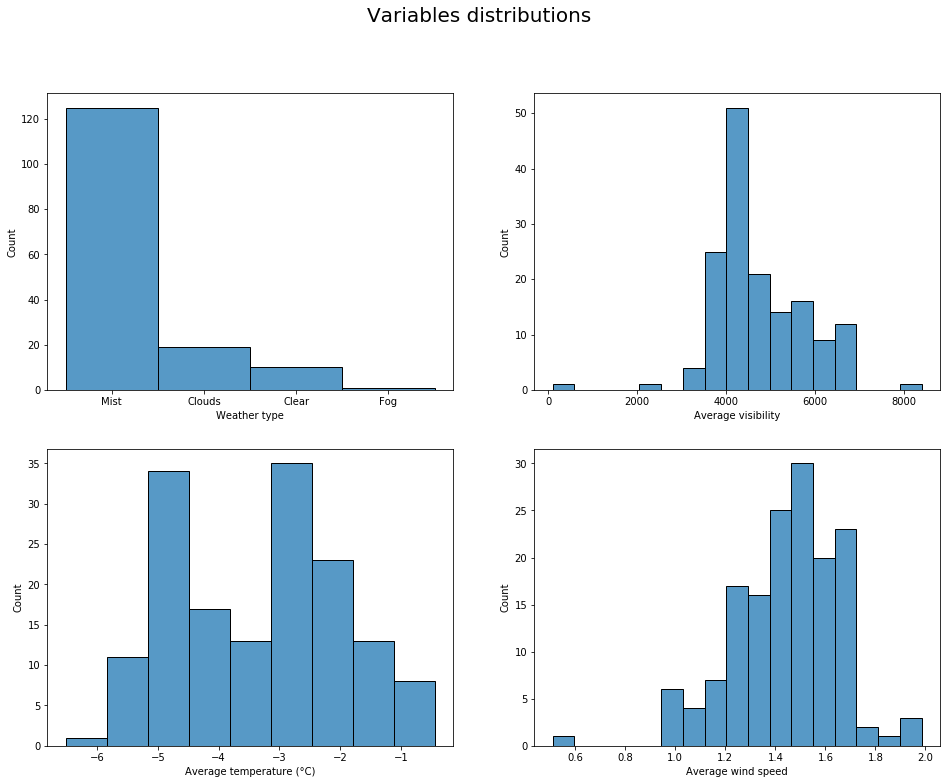

In [29]:
plt.figure(figsize=(16,12))
plt.subplot(2, 2, 1)

sns.histplot(data=weather_data, x='mode_weather_main')
plt.xlabel('Weather type')

plt.subplot(2, 2, 2)

sns.histplot(x=weather_data['avg_visibility'])
plt.xlabel('Average visibility')

plt.subplot(2, 2, 3)

sns.histplot(x=weather_data['avg_temp'] - 273.15)
plt.xlabel('Average temperature (\N{DEGREE SIGN}C)')

plt.subplot(2, 2, 4)

sns.histplot(x=weather_data['avg_wind_speed'])
plt.xlabel('Average wind speed')

plt.suptitle('Variables distributions', fontsize=20)
plt.savefig('distributions.svg', bbox_inches='tight')
plt.show()

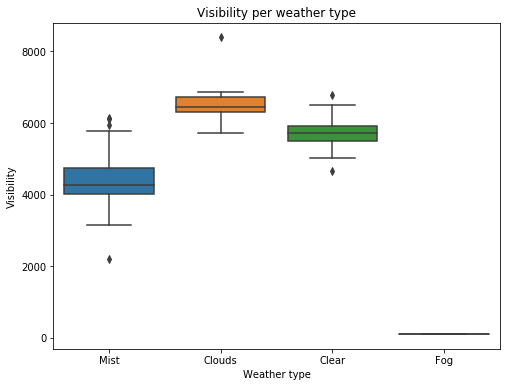

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(x=weather_data['mode_weather_main'], y=weather_data['avg_visibility'])
plt.ylabel('Visibility')
plt.xlabel('Weather type')
plt.title('Visibility per weather type')
plt.savefig('visibility_weather.svg', bbox_inches='tight')
plt.show()

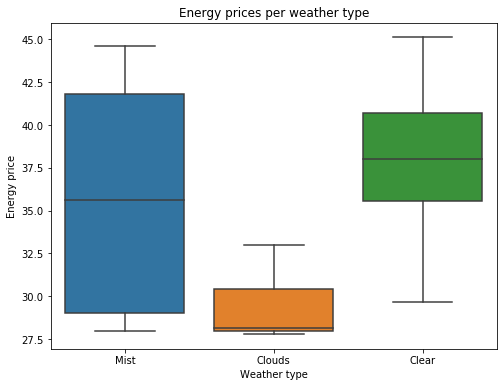

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x=joined_data['mode_weather_main'], y=joined_data['avg_price'])
plt.ylabel('Energy price')
plt.xlabel('Weather type')
plt.title('Energy prices per weather type')
plt.savefig('energy_weather.svg', bbox_inches='tight')
plt.show()

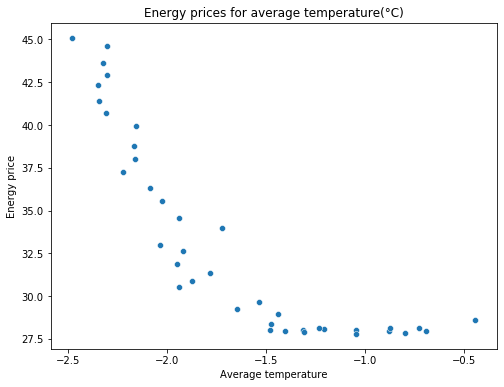

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=joined_data['avg_temp'] - 273.15, y=joined_data['avg_price'])
plt.ylabel('Energy price')
plt.xlabel('Average temperature')
plt.title('Energy prices for average temperature(\N{DEGREE SIGN}C)')
plt.savefig('energy_temp.svg', bbox_inches='tight')
plt.show()

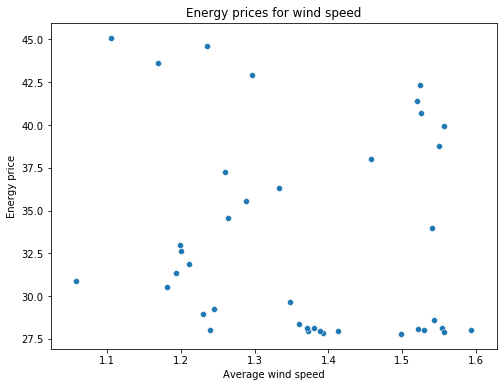

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=joined_data['avg_wind_speed'], y=joined_data['avg_price'])
plt.ylabel('Energy price')
plt.xlabel('Average wind speed')
plt.title('Energy prices for wind speed')
plt.savefig('energy_wind.svg', bbox_inches='tight')
plt.show()

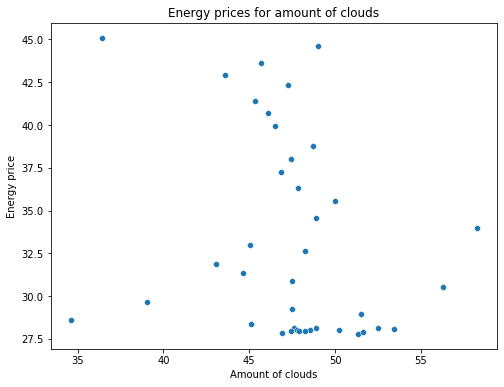

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=joined_data['avg_clouds'], y=joined_data['avg_price'])
plt.ylabel('Energy price')
plt.xlabel('Amount of clouds')
plt.title('Energy prices for amount of clouds')
plt.savefig('energy_clouds.svg', bbox_inches='tight')
plt.show()